# 第二回：艺术画笔见乾坤


## 一、概述

### 1. matplotlib的三层api
matplotlib的原理或者说基础逻辑是，用Artist对象在画布(canvas)上绘制(Render)图形。  
就和人作画的步骤类似：  
1. 准备一块画布或画纸
2. 准备好颜料、画笔等制图工具
3. 作画
   

所以matplotlib有三个层次的API：  

`matplotlib.backend_bases.FigureCanvas` 代表了绘图区，所有的图像都是在绘图区完成的  
`matplotlib.backend_bases.Renderer` 代表了渲染器，可以近似理解为画笔，控制如何在 FigureCanvas 上画图。  
`matplotlib.artist.Artist` 代表了具体的图表组件，即调用了Renderer的接口在Canvas上作图。  
前两者处理程序和计算机的底层交互的事项，第三项Artist就是具体的调用接口来做出我们想要的图，比如图形、文本、线条的设定。所以通常来说，我们95%的时间，都是用来和matplotlib.artist.Artist类打交道的。



### 2. Artist的分类
Artist有两种类型：`primitives` 和`containers`。 

`primitive`是基本要素，它包含一些我们要在绘图区作图用到的标准图形对象，如**曲线Line2D，文字text，矩形Rectangle，图像image**等。   

`container`是容器，即用来装基本要素的地方，包括**图形figure、坐标系Axes和坐标轴Axis**。他们之间的关系如下图所示：  
![分类](https://img-blog.csdnimg.cn/20201122230916134.jpeg?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl8zODYwNDk2MQ==,size_16,color_FFFFFF,t_70#pic_center)  

### 3. matplotlib标准用法
matplotlib的标准使用流程为：  
1. 创建一个`Figure`实例
2. 使用`Figure`实例创建一个或者多个`Axes`或`Subplot`实例
3. 使用`Axes`实例的辅助方法来创建`primitive`  

值得一提的是，Axes是一种容器，它可能是matplotlib API中最重要的类，并且我们大多数时间都花在和它打交道上。更具体的信息会在第三节容器小节说明。

一个流程示例及说明如下：

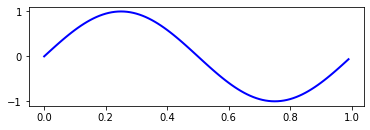

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# step 1 
# 我们用 matplotlib.pyplot.figure() 创建了一个Figure实例
fig = plt.figure()

# step 2
# 然后用Figure实例创建了一个两行一列(即可以有两个subplot)的绘图区，并同时在第一个位置创建了一个subplot
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

# step 3
# 然后用Axes实例的方法画了一条曲线
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

## 二、基本元素 - primitives
各容器中可能会包含多种`基本要素-primitives`, 所以先介绍下primitives，再介绍容器。

本章重点介绍下 `primitives` 的几种类型：**曲线-Line2D，矩形-Rectangle，图像-image** （其中文本-Text较为复杂，会在之后单独详细说明。）


### 1. 2DLines
在matplotlib中曲线的绘制，主要是通过类 `matplotlib.lines.Line2D` 来完成的。   
它的基类: `matplotlib.artist.Artist`   

matplotlib中`线-line`的含义：它表示的可以是连接所有顶点的实线样式，也可以是每个顶点的标记。此外，这条线也会受到绘画风格的影响，比如，我们可以创建虚线种类的线。

它的构造函数：

> class matplotlib.lines.Line2D(xdata, ydata, linewidth=None, linestyle=None, color=None, marker=None, markersize=None, markeredgewidth=None, markeredgecolor=None, markerfacecolor=None, markerfacecoloralt='none', fillstyle=None, antialiased=None, dash_capstyle=None, solid_capstyle=None, dash_joinstyle=None, solid_joinstyle=None, pickradius=5, drawstyle=None, markevery=None, **kwargs)



其中常用的的参数有：  
+ **xdata**:需要绘制的line中点的在x轴上的取值，若忽略，则默认为range(1,len(ydata)+1)
+ **ydata**:需要绘制的line中点的在y轴上的取值
+ **linewidth**:线条的宽度
+ **linestyle**:线型
+ **color**:线条的颜色
+ **marker**:点的标记，详细可参考[markers API](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
+ **markersize**:标记的size
  

其他详细参数可参考[Line2D官方文档](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#examples-using-matplotlib-lines-line2d)

#### a. 如何设置Line2D的属性
有三种方法可以用设置线的属性。  
1) 直接在plot()函数中设置  
2) 通过获得线对象，对线对象进行设置   
3) 获得线属性，使用setp()函数设置

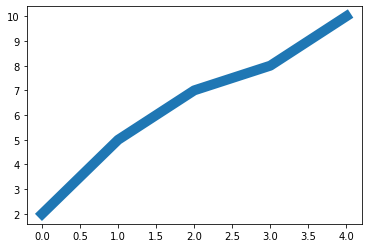

In [2]:
# 1) 直接在plot()函数中设置
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y, linewidth=10); # 设置线的粗细参数为10

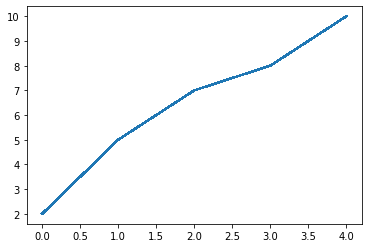

In [3]:
# 2) 通过获得线对象，对线对象进行设置
x = range(0,5)
y = [2,5,7,8,10]
line, = plt.plot(x, y, '-')
line.set_antialiased(False) # 关闭抗锯齿功能

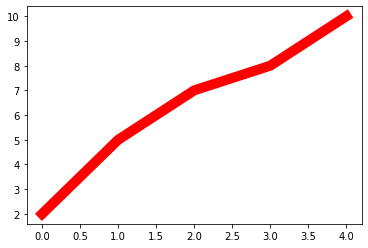

In [4]:
# 3) 获得线属性，使用setp()函数设置
x = range(0,5)
y = [2,5,7,8,10]
lines = plt.plot(x, y)
plt.setp(lines, color='r', linewidth=10);

#### b. 如何绘制lines
1) 绘制直线line  
2) errorbar绘制误差折线图  



绘制直线line常用的方法有两种:    
+ **pyplot方法绘制**  
+ **Line2D对象绘制**

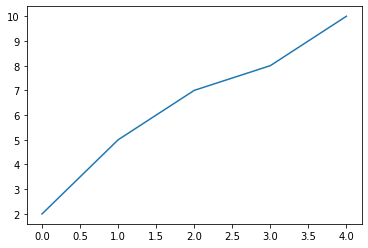

In [5]:
# 1. pyplot方法绘制
import matplotlib.pyplot as plt
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x,y);

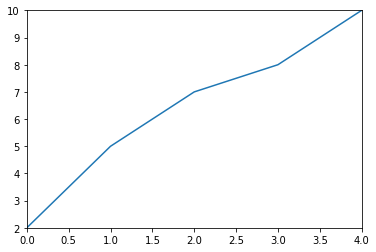

In [6]:
# 2. Line2D对象绘制
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D      

fig = plt.figure()
ax = fig.add_subplot(111)
line = Line2D(x, y)
ax.add_line(line)
ax.set_xlim(min(x), max(x))
ax.set_ylim(min(y), max(y))

plt.show()

**2) errorbar绘制误差折线图**  
pyplot里有个专门绘制误差线的功能，通过`errorbar`类实现，它的构造函数： 

>matplotlib.pyplot.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, \*, data=None, \**kwargs)

其中最主要的参数是前几个:  
+ **x**：需要绘制的line中点的在x轴上的取值  
+ **y**：需要绘制的line中点的在y轴上的取值  
+ **yerr**：指定y轴水平的误差  
+ **xerr**：指定x轴水平的误差   
+ **fmt**：指定折线图中某个点的颜色，形状，线条风格，例如‘co--’  
+ **ecolor**：指定error bar的颜色  
+ **elinewidth**：指定error bar的线条宽度  


绘制errorbar

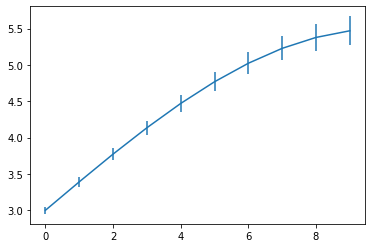

In [7]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
x = np.arange(10)
y = 2.5 * np.sin(x / 20 * np.pi)
yerr = np.linspace(0.05, 0.2, 10)
plt.errorbar(x, y + 3, yerr=yerr, label='both limits (default)');


### 2. patches
matplotlib.patches.Patch类是二维图形类。它的基类是matplotlib.artist.Artist，它的构造函数：  
详细清单见 [matplotlib.patches API](https://matplotlib.org/api/patches_api.html)  

  

> Patch(edgecolor=None, facecolor=None, color=None,
  linewidth=None, linestyle=None, antialiased=None,
  hatch=None, fill=True, capstyle=None, joinstyle=None,
  **kwargs)


#### a. Rectangle-矩形
`Rectangle`矩形类在官网中的定义是： 通过锚点xy及其宽度和高度生成。
Rectangle本身的主要比较简单，即xy控制锚点，width和height分别控制宽和高。它的构造函数：

> class matplotlib.patches.Rectangle(xy, width, height, angle=0.0, **kwargs)

在实际中最常见的矩形图是**`hist直方图`和`bar条形图`**。  

  

**1) hist-直方图**  

>matplotlib.pyplot.hist(x,bins=None,range=None, density=None, bottom=None, histtype='bar', align='mid', log=False, color=None, label=None, stacked=False, normed=None)

下面是一些常用的参数：  
+ **x**: 数据集，最终的直方图将对数据集进行统计
+ **bins**: 统计的区间分布
+ **range**: tuple, 显示的区间，range在没有给出bins时生效
+ **density**: bool，默认为false，显示的是频数统计结果，为True则显示频率统计结果，这里需要注意，频率统计结果=区间数目/(总数*区间宽度)，和normed效果一致，官方推荐使用density
+ **histtype**: 可选{'bar', 'barstacked', 'step', 'stepfilled'}之一，默认为bar，推荐使用默认配置，step使用的是梯状，stepfilled则会对梯状内部进行填充，效果与bar类似
+ **align**: 可选{'left', 'mid', 'right'}之一，默认为'mid'，控制柱状图的水平分布，left或者right，会有部分空白区域，推荐使用默认
+ **log**: bool，默认False,即y坐标轴是否选择指数刻度
+ **stacked**: bool，默认为False，是否为堆积状图

hist绘制直方图

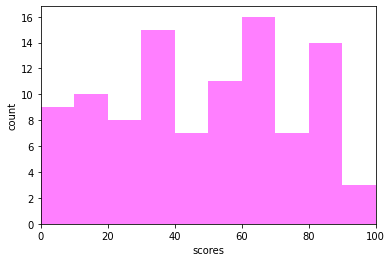

In [8]:
import matplotlib.pyplot as plt
import numpy as np 
x=np.random.randint(0,100,100) #生成[0-100)之间的100个数据,即 数据集 
bins=np.arange(0,101,10) #设置连续的边界值，即直方图的分布区间[0,10),[10,20)... 
plt.hist(x,bins,color='fuchsia',alpha=0.5)#alpha设置透明度，0为完全透明 
plt.xlabel('scores') 
plt.ylabel('count') 
plt.xlim(0,100)#设置x轴分布范围 
plt.show()

`Rectangle`矩形类绘制直方图

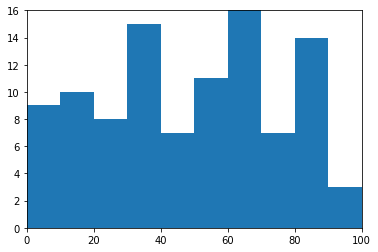

In [9]:
import pandas as pd
import re
df = pd.DataFrame(columns = ['data'])
df.loc[:,'data'] = x
df['fenzu'] = pd.cut(df['data'], bins=bins, right = False,include_lowest=True)

df_cnt = df['fenzu'].value_counts().reset_index()
df_cnt.loc[:,'mini'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\[(.*)\,',x)[0]).astype(int)
df_cnt.loc[:,'maxi'] = df_cnt['index'].astype(str).map(lambda x:re.findall('\,(.*)\)',x)[0]).astype(int)
df_cnt.loc[:,'width'] = df_cnt['maxi']- df_cnt['mini']
df_cnt.sort_values('mini',ascending = True,inplace = True)
df_cnt.reset_index(inplace = True,drop = True)

#用Rectangle把hist绘制出来
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in df_cnt.index:
    rect =  plt.Rectangle((df_cnt.loc[i,'mini'],0),df_cnt.loc[i,'width'],df_cnt.loc[i,'fenzu'])
    ax1.add_patch(rect)

ax1.set_xlim(0, 100)
ax1.set_ylim(0, 16)
plt.show()

**2) bar-柱状图**   

> matplotlib.pyplot.bar(left, height, alpha=1, width=0.8, color=, edgecolor=, label=, lw=3)

下面是一些常用的参数：    
+ **left**：x轴的位置序列，一般采用range函数产生一个序列，但是有时候可以是字符串  
+ **height**：y轴的数值序列，也就是柱形图的高度，一般就是我们需要展示的数据；  
+ **alpha**：透明度，值越小越透明  
+ **width**：为柱形图的宽度，一般这是为0.8即可；  
+ **color或facecolor**：柱形图填充的颜色；  
+ **edgecolor**：图形边缘颜色   
+ **label**：解释每个图像代表的含义，这个参数是为legend()函数做铺垫的，表示该次bar的标签      
  
   

有两种方式绘制柱状图
+ bar绘制柱状图  
+ `Rectangle`矩形类绘制柱状图

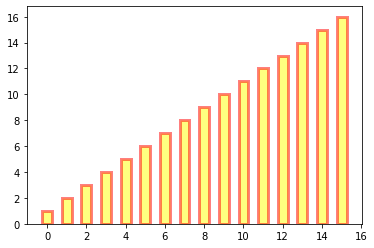

In [10]:
# bar绘制柱状图
import matplotlib.pyplot as plt
y = range(1,17)
plt.bar(np.arange(16), y, alpha=0.5, width=0.5, color='yellow', edgecolor='red', label='The First Bar', lw=3);

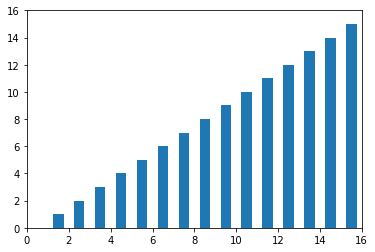

In [11]:
# Rectangle矩形类绘制柱状图
#import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)

for i in range(1,17):
    rect =  plt.Rectangle((i+0.25,0),0.5,i)
    ax1.add_patch(rect)
ax1.set_xlim(0, 16)
ax1.set_ylim(0, 16)
plt.show()

#### b. Polygon-多边形
matplotlib.patches.Polygon类是多边形类。其基类是matplotlib.patches.Patch，它的构造函数：

> class matplotlib.patches.Polygon(xy, closed=True, **kwargs)  

xy是一个N×2的numpy array，为多边形的顶点。  
closed为True则指定多边形将起点和终点重合从而显式关闭多边形。  


matplotlib.patches.Polygon类中常用的是fill类，它是基于xy绘制一个填充的多边形，它的定义：

> matplotlib.pyplot.fill(*args, data=None, **kwargs)

参数说明 : 关于x、y和color的序列，其中color是可选的参数，每个多边形都是由其节点的x和y位置列表定义的，后面可以选择一个颜色说明符。您可以通过提供多个x、y、[颜色]组来绘制多个多边形。

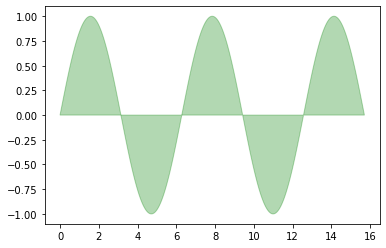

In [12]:
# 用fill来绘制图形
import matplotlib.pyplot as plt
x = np.linspace(0, 5 * np.pi, 1000) 
y1 = np.sin(x)
y2 = np.sin(2 * x) 
plt.fill(x, y1, color = "g", alpha = 0.3);

#### c. Wedge-契形
matplotlib.patches.Polygon类是多边形类。其基类是matplotlib.patches.Patch，它的构造函数：

> class matplotlib.patches.Wedge(center, r, theta1, theta2, width=None, **kwargs)  

一个Wedge-契形 是以坐标x,y为中心，半径为r，从θ1扫到θ2(单位是度)。  
如果宽度给定，则从内半径r -宽度到外半径r画出部分楔形。wedge中比较常见的是绘制饼状图。  


matplotlib.pyplot.pie语法：  
> matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=0, 0, frame=False, rotatelabels=False, *, normalize=None, data=None)

制作数据x的饼图，每个楔子的面积用x/sum(x)表示。    
其中最主要的参数是前4个：  
+ **x**：契型的形状，一维数组。
+ **explode**：如果不是等于None，则是一个len(x)数组，它指定用于偏移每个楔形块的半径的分数。  
+ **labels**：用于指定每个契型块的标记，取值是列表或为None。  
+ **colors**：饼图循环使用的颜色序列。如果取值为None，将使用当前活动循环中的颜色。  
+ **startangle**：饼状图开始的绘制的角度。   

pie绘制饼状图

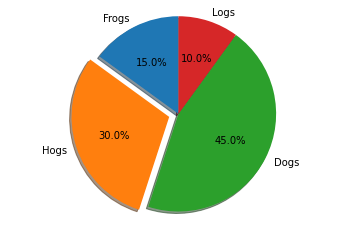

In [13]:
import matplotlib.pyplot as plt 
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10] 
explode = (0, 0.1, 0, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90) 
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.show()

wedge绘制饼图

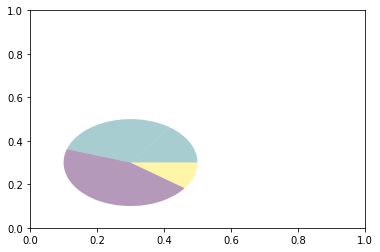

In [14]:
import matplotlib.pyplot as plt 
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection

fig = plt.figure()
ax1 = fig.add_subplot(111)
theta1 = 0
sizes = [15, 30, 45, 10] 
patches = []
patches += [
    Wedge((0.3, 0.3), .2, 0, 54),             # Full circle
    Wedge((0.3, 0.3), .2, 54, 162),  # Full ring
    Wedge((0.3, 0.3), .2, 162, 324),              # Full sector
    Wedge((0.3, 0.3), .2, 324, 360),  # Ring sector
]
colors = 100 * np.random.rand(len(patches))
p = PatchCollection(patches, alpha=0.4)
p.set_array(colors)
ax1.add_collection(p)
plt.show()

### 3. collections
collections类是用来绘制一组对象的集合，collections有许多不同的子类，如RegularPolyCollection, CircleCollection, Pathcollection, 分别对应不同的集合子类型。其中比较常用的就是散点图，它是属于PathCollection子类，scatter方法提供了该类的封装，根据x与y绘制不同大小或颜色标记的散点图。 它的构造方法：

> Axes.scatter(self, x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)


其中最主要的参数是前5个：  
+ **x**：数据点x轴的位置  
+ **y**：数据点y轴的位置  
+ **s**：尺寸大小  
+ **c**：可以是单个颜色格式的字符串，也可以是一系列颜色  
+ **marker**: 标记的类型

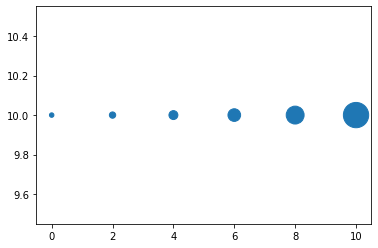

In [15]:
# 用scatter绘制散点图
x = [0,2,4,6,8,10] 
y = [10]*len(x) 
s = [20*2**n for n in range(len(x))] 
plt.scatter(x,y,s=s) 
plt.show()

### 4. images
images是matplotlib中绘制image图像的类，其中最常用的imshow可以根据数组绘制成图像，它的构造函数：
> class matplotlib.image.AxesImage(ax, cmap=None, norm=None, interpolation=None, origin=None, extent=None, filternorm=True, filterrad=4.0, resample=False, **kwargs)

imshow根据数组绘制图像
> matplotlib.pyplot.imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=<deprecated parameter>, filternorm=1, filterrad=4.0, imlim=<deprecated parameter>, resample=None, url=None, *, data=None, **kwargs）

使用imshow画图时首先需要传入一个数组，数组对应的是空间内的像素位置和像素点的值，interpolation参数可以设置不同的差值方法，具体效果如下。

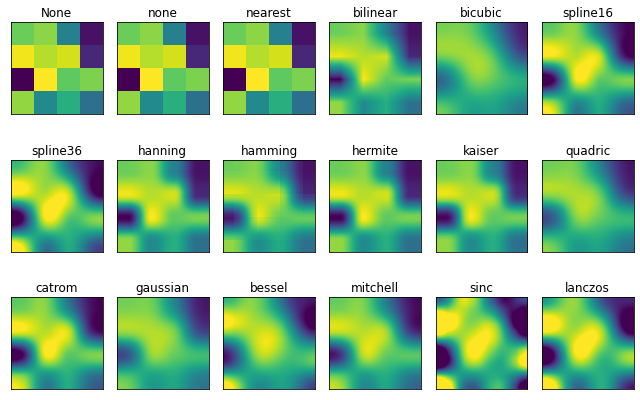

In [16]:
import matplotlib.pyplot as plt
import numpy as np
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']


grid = np.random.rand(4, 4)

fig, axs = plt.subplots(nrows=3, ncols=6, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

for ax, interp_method in zip(axs.flat, methods):
    ax.imshow(grid, interpolation=interp_method, cmap='viridis')
    ax.set_title(str(interp_method))

plt.tight_layout()
plt.show()

## 三、对象容器 - Object container
容器会包含一些`primitives`，并且容器还有它自身的属性。  
比如`Axes Artist`，它是一种容器，它包含了很多`primitives`，比如`Line2D`，`Text`；同时，它也有自身的属性，比如`xscal`，用来控制X轴是`linear`还是`log`的。  

### 1. Figure容器
`matplotlib.figure.Figure`是`Artist`最顶层的`container`-对象容器，它包含了图表中的所有元素。一张图表的背景就是在`Figure.patch`的一个矩形`Rectangle`。  
当我们向图表添加`Figure.add_subplot()`或者`Figure.add_axes()`元素时，这些都会被添加到`Figure.axes`列表中。

AxesSubplot(0.125,0.536818;0.775x0.343182)
[<AxesSubplot:>, <Axes:>]


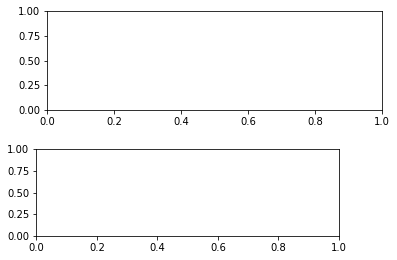

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(211) # 作一幅2*1的图，选择第1个子图
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.3]) # 位置参数，四个数分别代表了(left,bottom,width,height)
print(ax1) 
print(fig.axes) # fig.axes 中包含了subplot和axes两个实例, 刚刚添加的

​    


由于`Figure`维持了`current axes`，因此你不应该手动的从`Figure.axes`列表中添加删除元素，而是要通过`Figure.add_subplot()`、`Figure.add_axes()`来添加元素，通过`Figure.delaxes()`来删除元素。但是你可以迭代或者访问`Figure.axes`中的`Axes`，然后修改这个`Axes`的属性。   

比如下面的遍历axes里的内容，并且添加网格线：

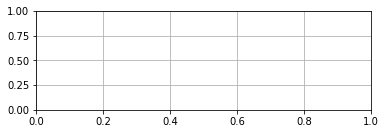

In [18]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

for ax in fig.axes:
    ax.grid(True)
    


`Figure`也有它自己的`text、line、patch、image`。你可以直接通过`add primitive`语句直接添加。但是注意`Figure`默认的坐标系是以像素为单位，你可能需要转换成figure坐标系：(0,0)表示左下点，(1,1)表示右上点。

**Figure容器的常见属性：**  
`Figure.patch`属性：Figure的背景矩形  
`Figure.axes`属性：一个Axes实例的列表（包括Subplot)  
`Figure.images`属性：一个FigureImages patch列表  
`Figure.lines`属性：一个Line2D实例的列表（很少使用）  
`Figure.legends`属性：一个Figure Legend实例列表（不同于Axes.legends)  
`Figure.texts`属性：一个Figure Text实例列表  

### 2. Axes容器

`matplotlib.axes.Axes`是matplotlib的核心。大量的用于绘图的`Artist`存放在它内部，并且它有许多辅助方法来创建和添加`Artist`给它自己，而且它也有许多赋值方法来访问和修改这些`Artist`。  

和`Figure`容器类似，`Axes`包含了一个patch属性，对于笛卡尔坐标系而言，它是一个`Rectangle`；对于极坐标而言，它是一个`Circle`。这个patch属性决定了绘图区域的形状、背景和边框。

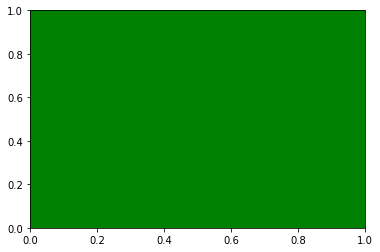

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig = plt.figure()
ax = fig.add_subplot(111)
rect = ax.patch  # axes的patch是一个Rectangle实例
rect.set_facecolor('green')

`Axes`有许多方法用于绘图，如`.plot()、.text()、.hist()、.imshow()`等方法用于创建大多数常见的`primitive`(如`Line2D，Rectangle，Text，Image`等等）。在`primitives`中已经涉及，不再赘述。   

Subplot就是一个特殊的Axes，其实例是位于网格中某个区域的Subplot实例。其实你也可以在任意区域创建Axes，通过Figure.add_axes([left,bottom,width,height])来创建一个任意区域的Axes，其中left,bottom,width,height都是[0—1]之间的浮点数，他们代表了相对于Figure的坐标。

你不应该直接通过`Axes.lines`和`Axes.patches`列表来添加图表。因为当创建或添加一个对象到图表中时，`Axes`会做许多自动化的工作:  
它会设置Artist中figure和axes的属性，同时默认Axes的转换；  
它也会检视Artist中的数据，来更新数据结构，这样数据范围和呈现方式可以根据作图范围自动调整。  

你也可以使用Axes的辅助方法`.add_line()`和`.add_patch()`方法来直接添加。  

另外Axes还包含两个最重要的Artist container：

`ax.xaxis`：XAxis对象的实例，用于处理x轴tick以及label的绘制  
`ax.yaxis`：YAxis对象的实例，用于处理y轴tick以及label的绘制  
会在下面章节详细说明。

**Axes容器**的常见属性有：  
`artists`:    Artist实例列表
`patch`:     Axes所在的矩形实例
`collections`: Collection实例
`images`:    Axes图像
`legends`:	  Legend 实例
`lines`:	  Line2D 实例
`patches`:	  Patch 实例
`texts`:	  Text 实例
`xaxis`:	  matplotlib.axis.XAxis 实例
`yaxis`:	  matplotlib.axis.YAxis 实例

### 3. Axis容器

`matplotlib.axis.Axis`实例处理`tick line`、`grid line`、`tick label`以及`axis label`的绘制，它包括坐标轴上的刻度线、刻度`label`、坐标网格、坐标轴标题。通常你可以独立的配置y轴的左边刻度以及右边的刻度，也可以独立地配置x轴的上边刻度以及下边的刻度。

刻度包括主刻度和次刻度，它们都是Tick刻度对象。  

`Axis`也存储了用于自适应，平移以及缩放的`data_interval`和`view_interval`。它还有Locator实例和Formatter实例用于控制刻度线的位置以及刻度label。

每个Axis都有一个`label`属性，也有主刻度列表和次刻度列表。这些`ticks`是`axis.XTick`和`axis.YTick`实例，它们包含着`line primitive`以及`text primitive`用来渲染刻度线以及刻度文本。

刻度是动态创建的，只有在需要创建的时候才创建（比如缩放的时候）。Axis也提供了一些辅助方法来获取刻度文本、刻度线位置等等：  
常见的如下：

array([-0.2,  4.2])

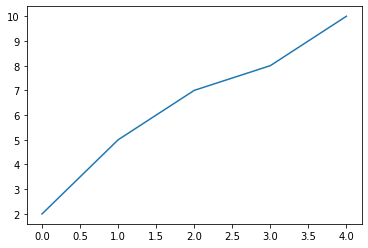

In [20]:
# 不用print，直接显示结果
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

fig, ax = plt.subplots()
x = range(0,5)
y = [2,5,7,8,10]
plt.plot(x, y, '-')

axis = ax.xaxis # axis为X轴对象
axis.get_ticklocs()     # 获取刻度线位置
axis.get_ticklabels()   # 获取刻度label列表(一个Text实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick label。
axis.get_ticklines()    # 获取刻度线列表(一个Line2D实例的列表）。 可以通过minor=True|False关键字参数控制输出minor还是major的tick line。
axis.get_data_interval()# 获取轴刻度间隔
axis.get_view_interval()# 获取轴视角（位置）的间隔

下面的例子展示了如何调整一些轴和刻度的属性(忽略美观度，仅作调整参考)：

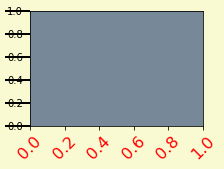

In [21]:
fig = plt.figure() # 创建一个新图表
rect = fig.patch   # 矩形实例并将其设为黄色
rect.set_facecolor('lightgoldenrodyellow')

ax1 = fig.add_axes([0.1, 0.3, 0.4, 0.4]) # 创一个axes对象，从(0.1,0.3)的位置开始，宽和高都为0.4，
rect = ax1.patch   # ax1的矩形设为灰色
rect.set_facecolor('lightslategray')


for label in ax1.xaxis.get_ticklabels(): 
    # 调用x轴刻度标签实例，是一个text实例
    label.set_color('red') # 颜色
    label.set_rotation(45) # 旋转角度
    label.set_fontsize(16) # 字体大小

for line in ax1.yaxis.get_ticklines():
    # 调用y轴刻度线条实例, 是一个Line2D实例
    line.set_color('green')    # 颜色
    line.set_markersize(25)    # marker大小
    line.set_markeredgewidth(2)# marker粗细

plt.show()

### 4. Tick容器

`matplotlib.axis.Tick`是从`Figure`到`Axes`到`Axis`到`Tick`中最末端的容器对象。  
`Tick`包含了`tick`、`grid line`实例以及对应的`label`。 

所有的这些都可以通过`Tick`的属性获取，常见的`tick`属性有     
`Tick.tick1line`：Line2D实例  
`Tick.tick2line`：Line2D实例  
`Tick.gridline`：Line2D实例  
`Tick.label1`：Text实例  
`Tick.label2`：Text实例  

y轴分为左右两个，因此tick1对应左侧的轴；tick2对应右侧的轴。   
x轴分为上下两个，因此tick1对应下侧的轴；tick2对应上侧的轴。  

下面的例子展示了，如何将Y轴右边轴设为主轴，并将标签设置为美元符号且为绿色：

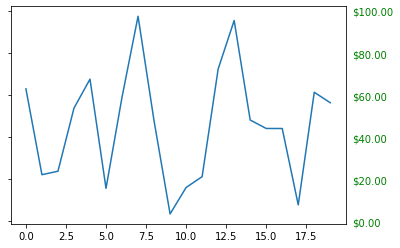

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

fig, ax = plt.subplots()
ax.plot(100*np.random.rand(20))

# 设置ticker的显示格式
formatter = matplotlib.ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

# 设置ticker的参数，右侧为主轴，颜色为绿色
ax.yaxis.set_tick_params(which='major', labelcolor='green',
                         labelleft=False, labelright=True);



## 参考资料
[1. matplotlib设计的基本逻辑](https://zhuanlan.zhihu.com/p/32693665)  
[2. matplotlib.artist api](https://matplotlib.org/api/artist_api.html)  
[3. matplotlib官方教程](https://matplotlib.org/tutorials/intermediate/artists.html#sphx-glr-tutorials-intermediate-artists-py)  
[4. AI算法工程师手册](https://www.bookstack.cn/read/huaxiaozhuan-ai/spilt.2.333f5abdbabf383d.md)